<a href="https://colab.research.google.com/github/purnachand1186/bankMarketing_ML/blob/main/prompt_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_auc_score,r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [126]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [127]:
print(f"Rows :{df.shape[0]} , Features: {df.shape[1]}")

Rows :41188 , Features: 21


In [128]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [129]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

**Check if the data has any null values**

In [131]:
# create a data frame with missing values and percentage of missing values for each column
def missing_df(df):
  total_missing_value = df.isnull().sum()
  percent_missing_value = round(total_missing_value*100/len(df),2)
  missing_valus_df = pd.DataFrame({'count': total_missing_value, 'percentage': percent_missing_value})
  return missing_valus_df

missing_data = missing_df(df)
missing_data[missing_data['count']>0]

,count,percentage


In [132]:
# find the unique values in each column
unique_vals = df.nunique(axis=0)
unique_vals

,0
age,78
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


In [133]:
df['y'].value_counts(normalize=True)

,proportion
y,
no,0.887346
yes,0.112654


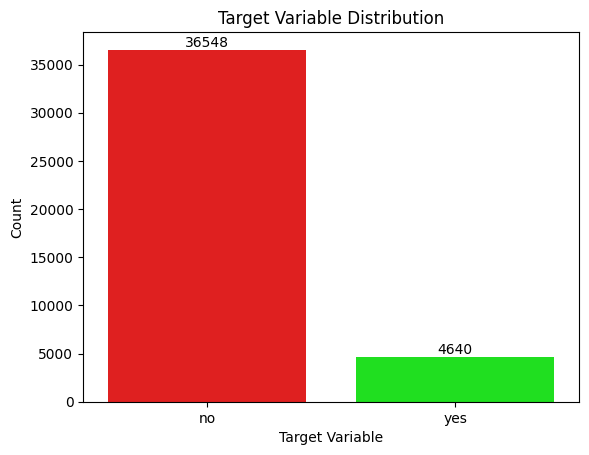

In [134]:
ax = sns.countplot(x=df['y'], palette=["#FF0000", "#00FF00"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Target Variable Distribution')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

**Observations**: Percentage of 'No' values are high in the provided data thus its an unbalanced data

**Remove Outliers code**

In [135]:
def remove_outliers(df, column):
    factor =1.5
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

**Diagram show the distribution of ages in the dataset**


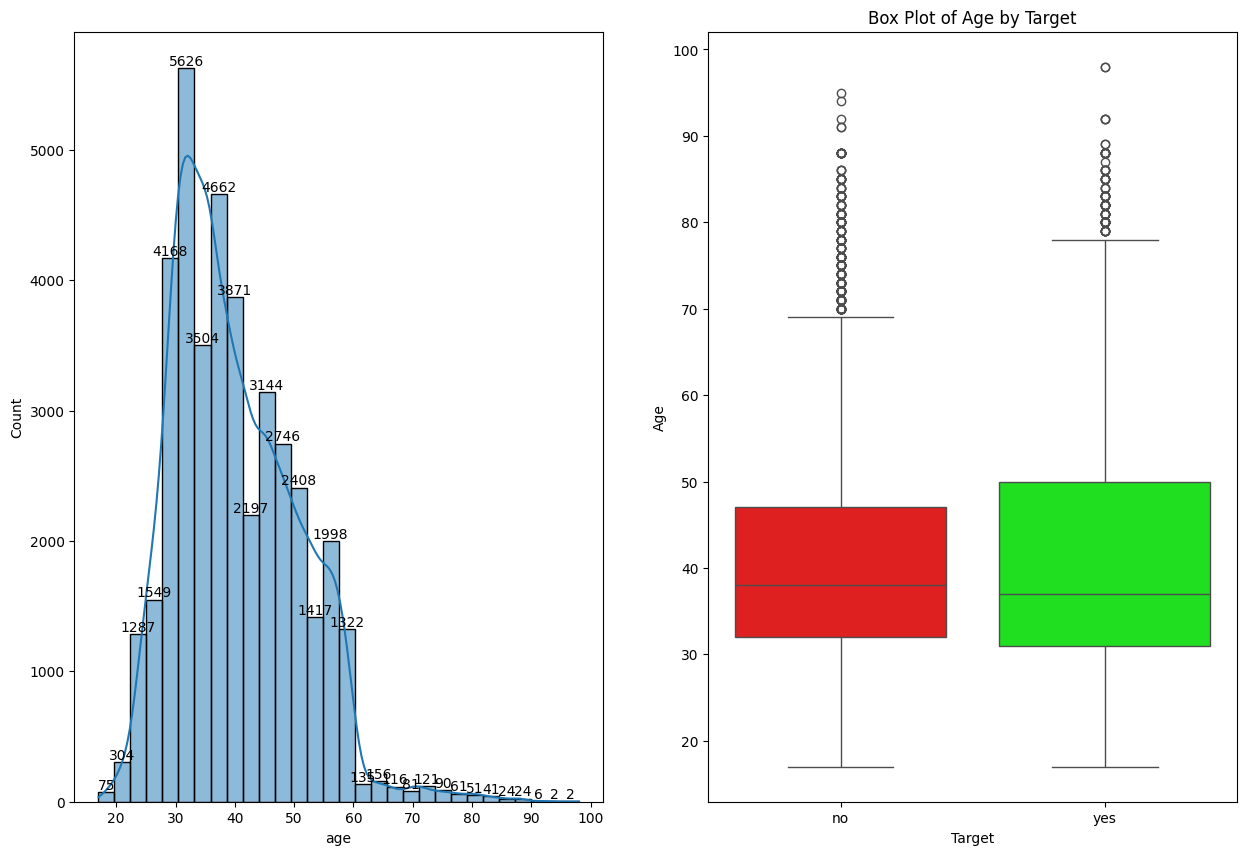

In [136]:
# plot a histogram diagram & box plot for the the age
fig, ax = plt.subplots(1,2,figsize=(15,10))
fig = sns.histplot(df['age'],bins=30, kde=True, palette = 'bright', ax=ax[0])
for container in fig.containers:
    fig.bar_label(container)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
fig = sns.boxplot(data = df, x='y', y='age', palette = ["#FF0000", "#00FF00"], ax=ax[1])
plt.title('Box Plot of Age by Target')
plt.xlabel('Target')
plt.ylabel('Age')
plt.show()


**From the above diagrams, for both the categories for subscribed and not subscribed the average age is in between 35-38, this feature may not be a factor in subscribing or not**

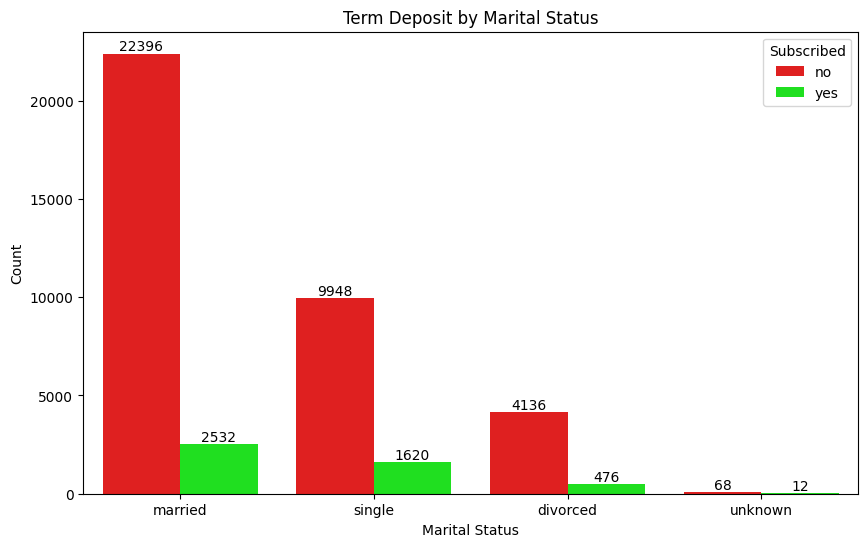

In [137]:
# plot a diagram for term deposit by marital status

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='marital', hue='y', data=df, palette=["#FF0000", "#00FF00"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Term Deposit by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.show()

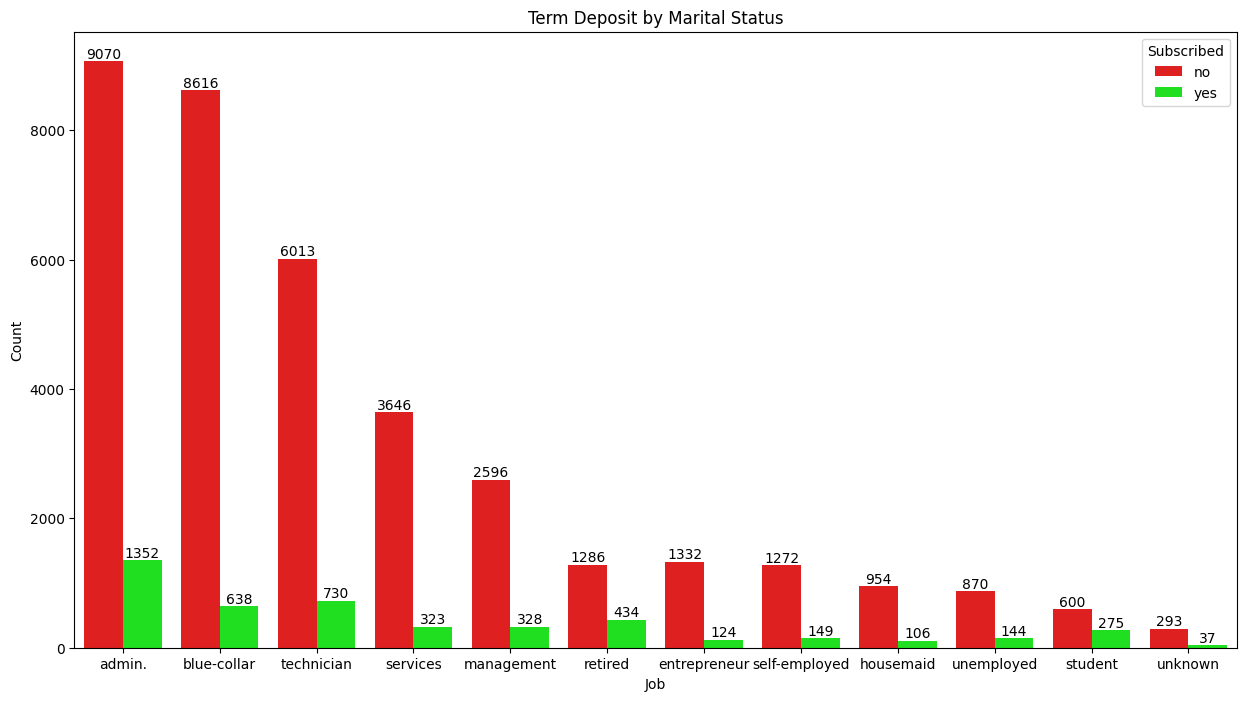

In [138]:
# plot a diagram for term deposit by Job status

plt.figure(figsize=(15, 8))
ax = sns.countplot(x='job', hue='y', data=df,order=df['job'].value_counts().index, palette=["#FF0000", "#00FF00"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Term Deposit by Marital Status')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.show()

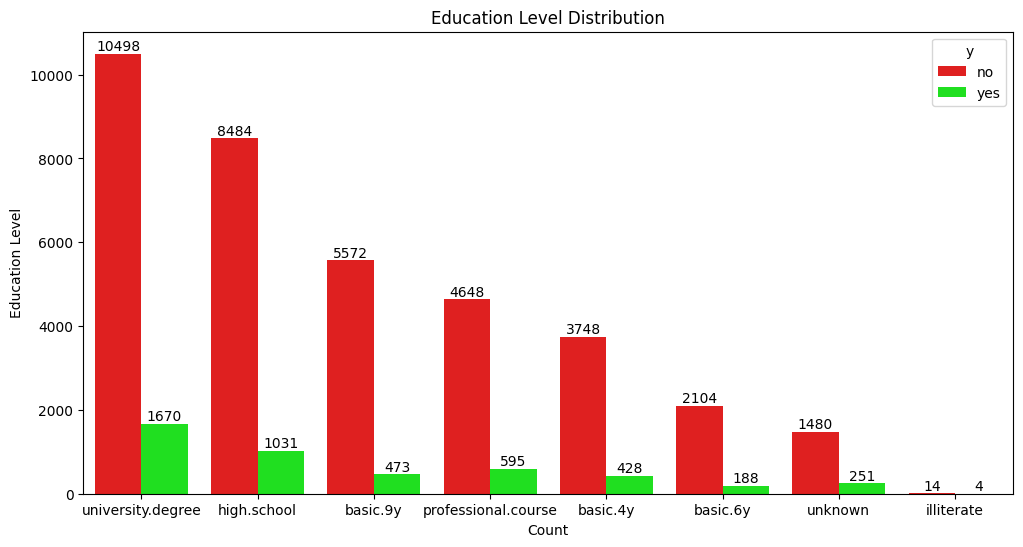

In [139]:
# Education Level Distribution
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='education', data=df, hue='y', order=df['education'].value_counts().index,palette=["#FF0000", "#00FF00"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

**As per the data desciption 'Duration' may play a cruicial role in Deposit subscription**

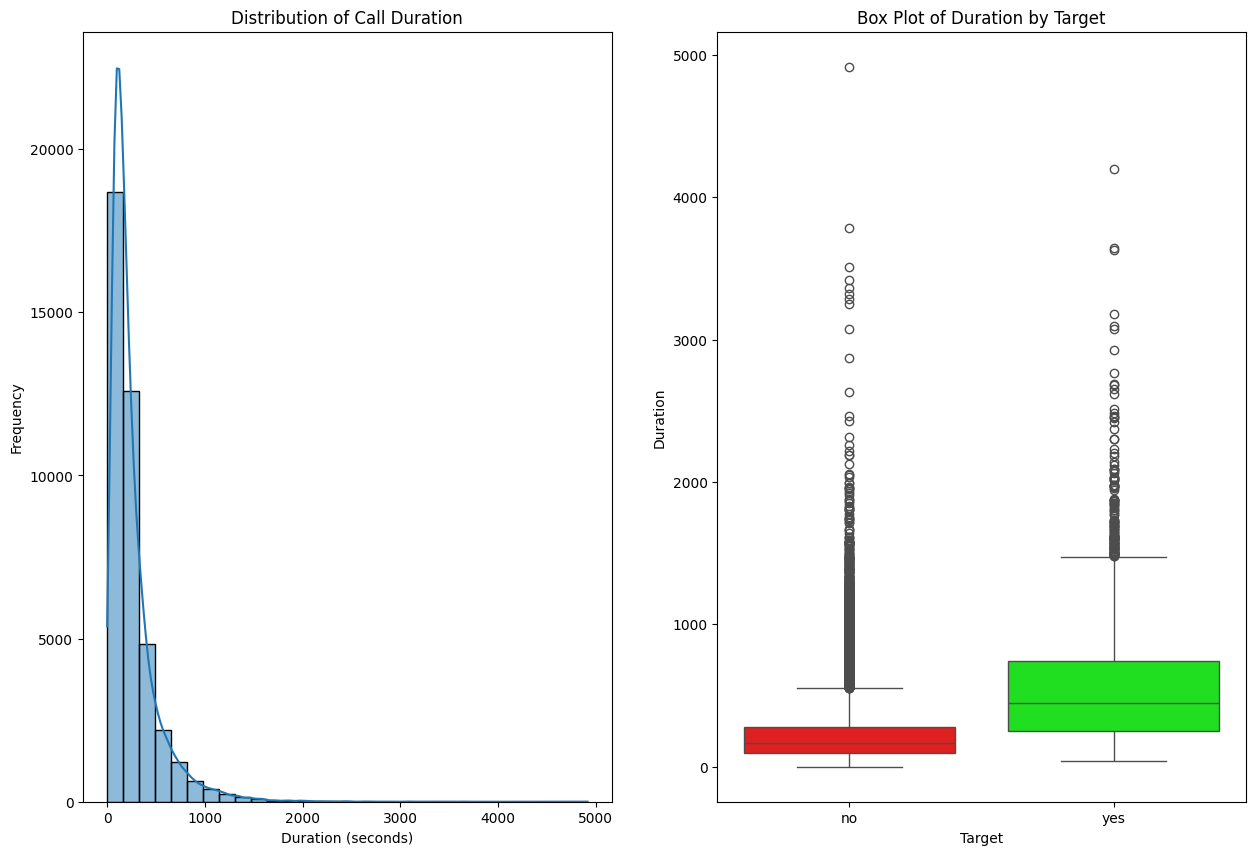

In [140]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
fig = sns.histplot(df['duration'], bins=30, kde=True, ax = ax[0])
fig.set_title('Distribution of Call Duration')
fig.set_xlabel('Duration (seconds)')
fig.set_ylabel('Frequency')
fig = sns.boxplot(data = df, x='y', y='duration', palette = ["#FF0000", "#00FF00"], ax=ax[1])
fig.set_title('Box Plot of Duration by Target')
fig.set_xlabel('Target')
fig.set_ylabel('Duration')
plt.show()


**Observation: There are clearly outliers exists in the duration column, it would be ideal to remove the outliers**

In [141]:
df = remove_outliers(df,'duration')

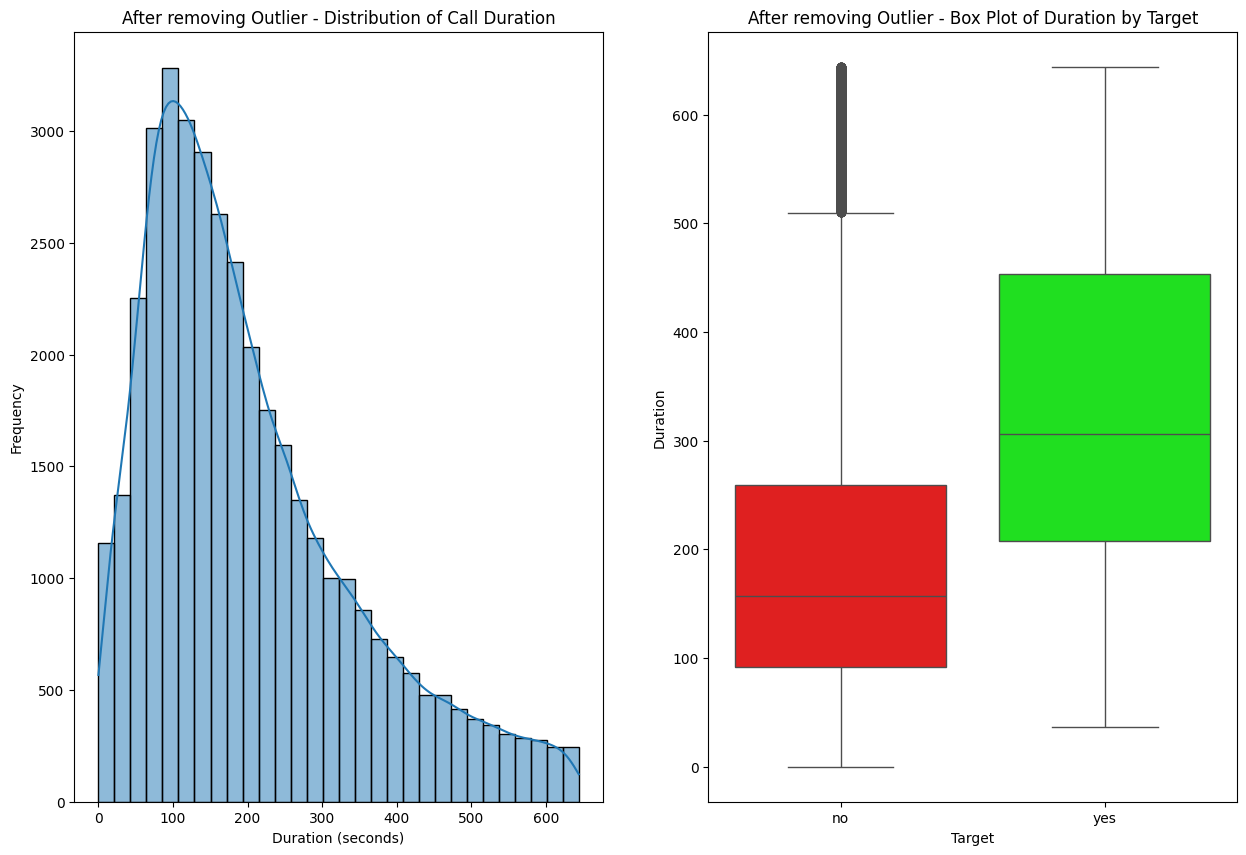

In [142]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
fig = sns.histplot(df['duration'], bins=30, kde=True, ax = ax[0])
fig.set_title('After removing Outlier - Distribution of Call Duration')
fig.set_xlabel('Duration (seconds)')
fig.set_ylabel('Frequency')
fig = sns.boxplot(data = df, x='y', y='duration', palette = ["#FF0000", "#00FF00"], ax=ax[1])
fig.set_title('After removing Outlier - Box Plot of Duration by Target')
fig.set_xlabel('Target')
fig.set_ylabel('Duration')
plt.show()

**Subscriiption to Term Deposit by Campain (Number of calls)**

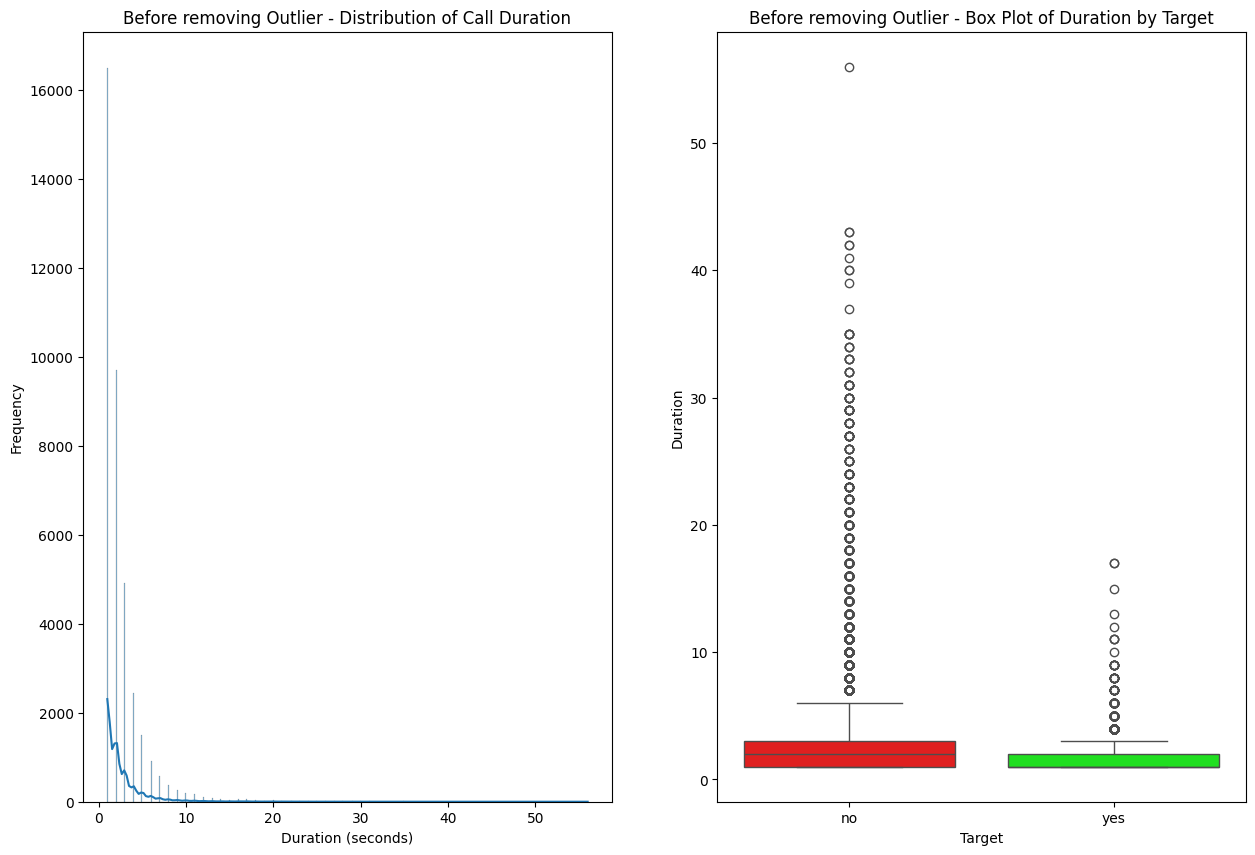

In [143]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
fig = sns.histplot(df['campaign'], kde=True, ax = ax[0])
fig.set_title('Before removing Outlier - Distribution of Call Duration')
fig.set_xlabel('Duration (seconds)')
fig.set_ylabel('Frequency')
fig = sns.boxplot(x='y', y='campaign', data=df,palette=["#FF0000", "#00FF00"],ax = ax[1])
fig.set_title('Before removing Outlier - Box Plot of Duration by Target')
fig.set_xlabel('Target')
fig.set_ylabel('Duration')
plt.show()

**From the above diagrams it is clear that most of the campaign durations never crossed 10 seconds, so lets perform IQR and remove outliers**

In [144]:
# remove outliers from 'camp'
df = remove_outliers(df,'campaign')

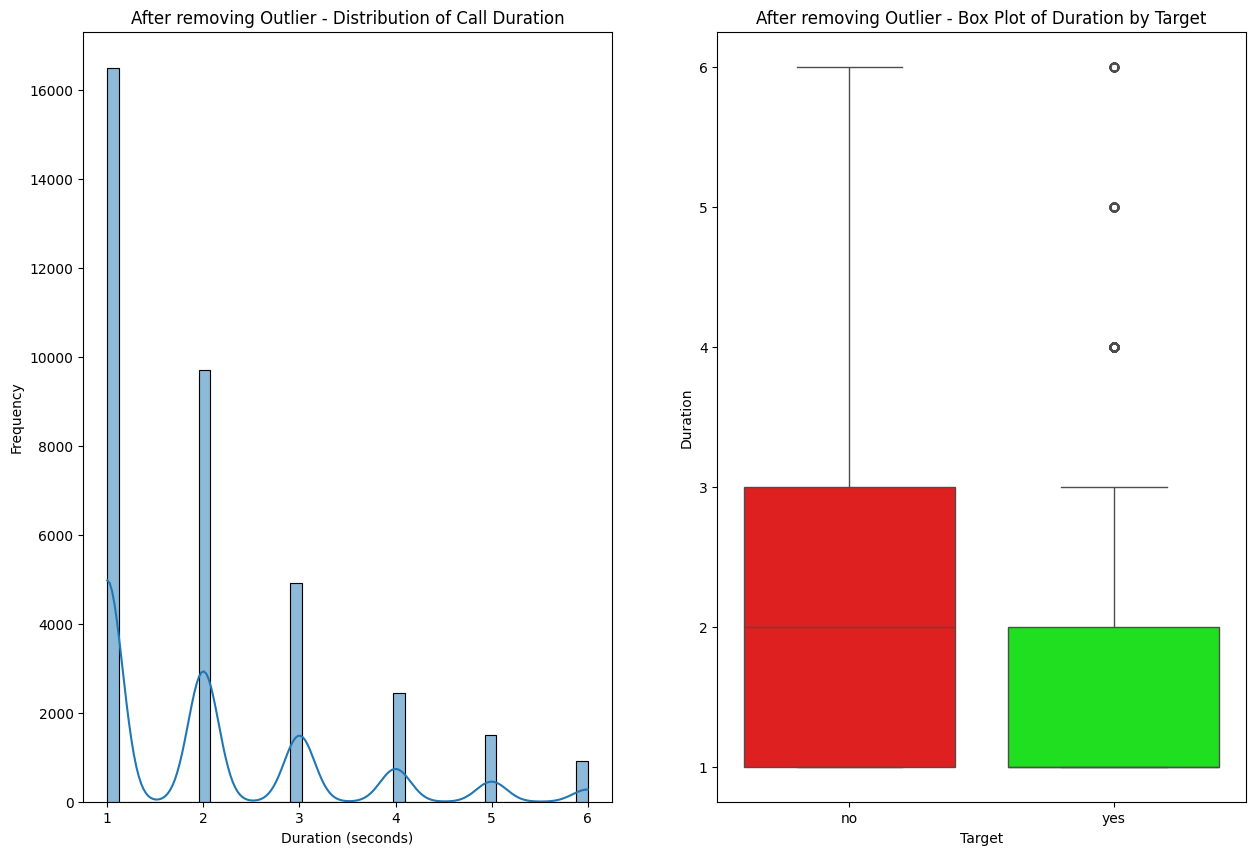

In [145]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
fig = sns.histplot(df['campaign'], kde=True, ax = ax[0])
fig.set_title('After removing Outlier - Distribution of Call Duration')
fig.set_xlabel('Duration (seconds)')
fig.set_ylabel('Frequency')
fig = sns.boxplot(x='y', y='campaign', data=df,palette=["#FF0000", "#00FF00"],ax = ax[1])
fig.set_title('After removing Outlier - Box Plot of Duration by Target')
fig.set_xlabel('Target')
fig.set_ylabel('Duration')
plt.show()

**Impact of Number of Pdays and Previous**

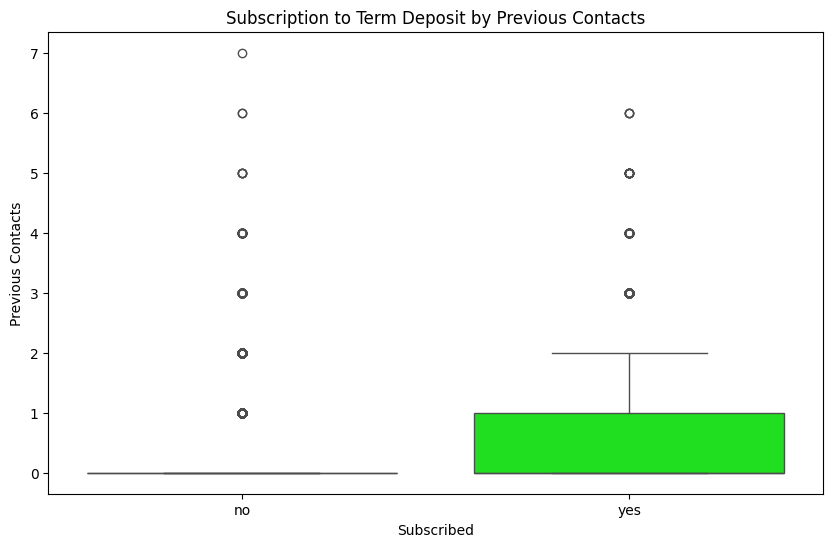

In [146]:
#draw plot for analysis on Pdays and Previous
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='previous', data=df,palette=["#FF0000", "#00FF00"])
plt.title('Subscription to Term Deposit by Previous Contacts')
plt.xlabel('Subscribed')
plt.ylabel('Previous Contacts')
plt.show()

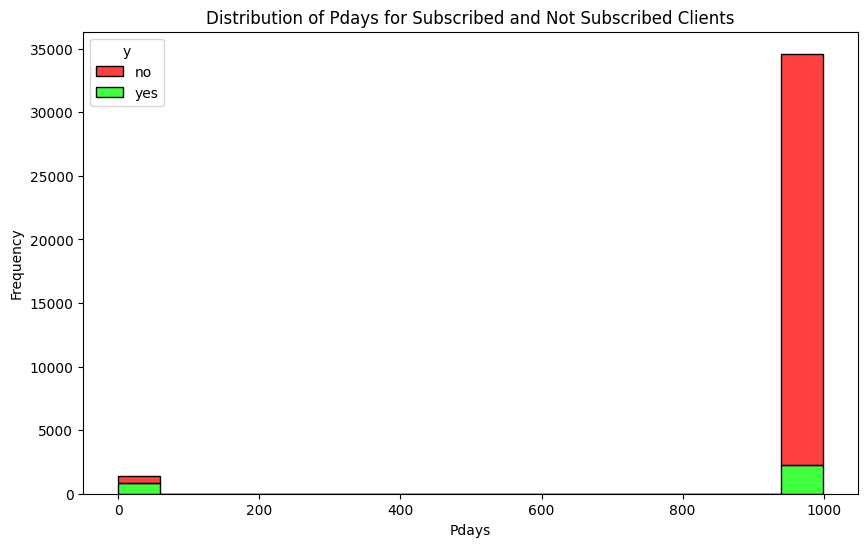

In [147]:
# Plot: Distribution of Pdays for Subscribed and Not Subscribed Clients
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='pdays', hue='y', multiple='stack',palette=["#FF0000", "#00FF00"] )
plt.title('Distribution of Pdays for Subscribed and Not Subscribed Clients')
plt.xlabel('Pdays')
plt.ylabel('Frequency')
plt.show()

**From the above diagram it seems like Pdays does not have much impact on the results, so let delete this feature**

In [148]:
df.drop(columns=['pdays'],inplace = True)

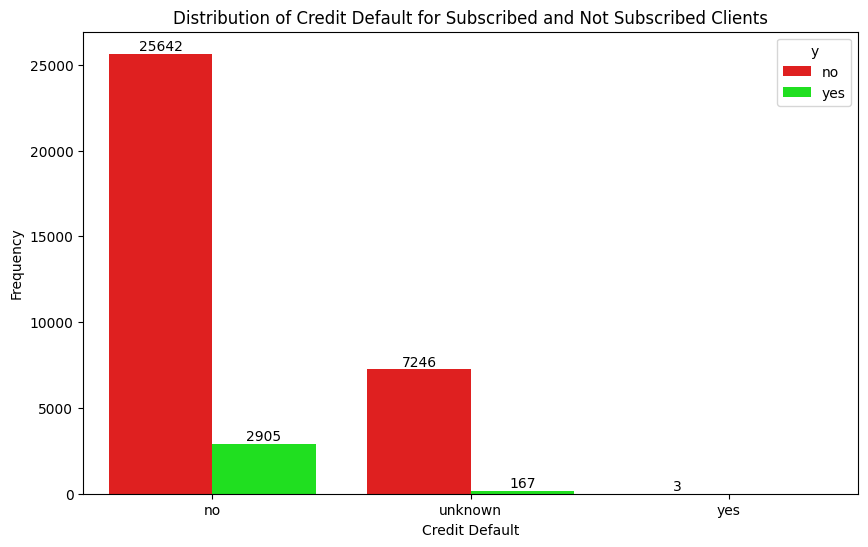

In [149]:
#Distribution of credeit default for Subscribed and Not subscribed users
plt.figure(figsize=(10, 6))
fig = sns.countplot(data=df, x='default', hue='y', palette=["#FF0000", "#00FF00"])
for container in fig.containers:
    fig.bar_label(container)
plt.title('Distribution of Credit Default for Subscribed and Not Subscribed Clients')
plt.xlabel('Credit Default')
plt.ylabel('Frequency')
plt.show()

**From the above Diagram, the banks are not providng loans for those people who have default as Yes**

**Histograms for Housing Loan and Personal Loan**

<Axes: title={'center': 'Histogram for Personal Loan'}, xlabel='Personal Loan Status', ylabel='Frequency'>

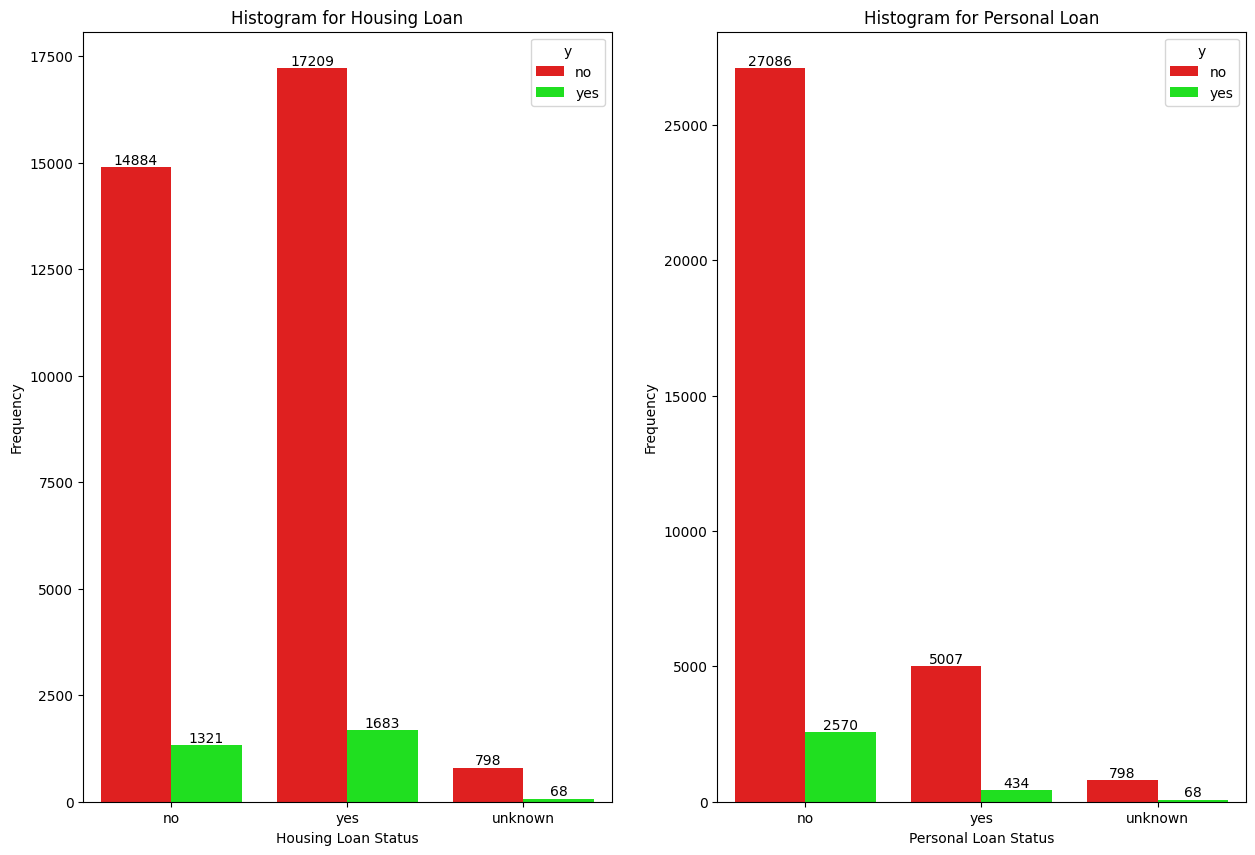

In [150]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
fig = sns.countplot(data=df, x='housing', palette=["#FF0000", "#00FF00"], hue='y', ax=ax[0])
fig.set_title('Histogram for Housing Loan')
fig.set_xlabel('Housing Loan Status')
fig.set_ylabel('Frequency')
for container in fig.containers:
    fig.bar_label(container)
fig = sns.countplot(data=df, x='loan', palette=["#FF0000", "#00FF00"], hue='y',ax=ax[1])
fig.set_title('Histogram for Personal Loan')
fig.set_xlabel('Personal Loan Status')
fig.set_ylabel('Frequency')
for container in fig.containers:
    fig.bar_label(container)
fig

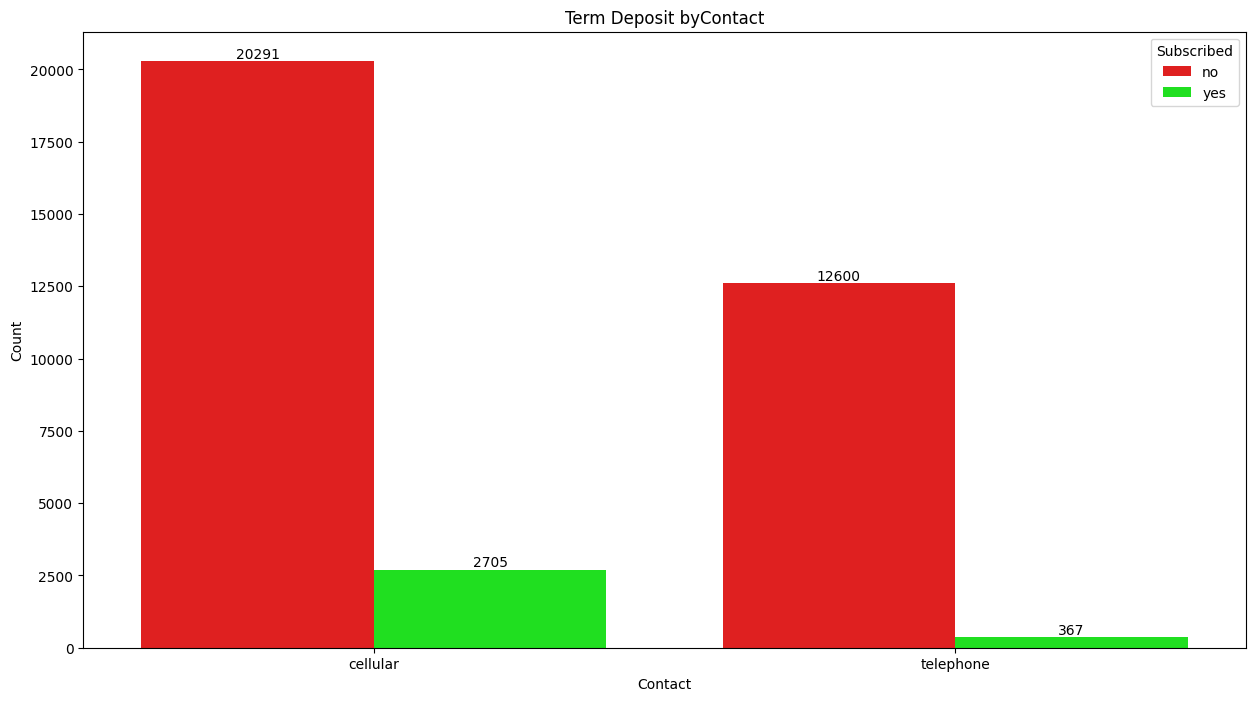

In [151]:
# plot a diagram for term deposit by contact

plt.figure(figsize=(15, 8))
ax = sns.countplot(x='contact', hue='y', data=df,order=df['contact'].value_counts().index, palette=["#FF0000", "#00FF00"])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Term Deposit byContact')
plt.xlabel('Contact')
plt.ylabel('Count')
plt.legend(title='Subscribed')
plt.show()

In [152]:
#Clean data with no nulls
df.isna().any()

,0
age,False
job,False
marital,False
education,False
default,False
housing,False
loan,False
contact,False
month,False
day_of_week,False


**Observations**
After Reviewing the above diagrams where the customer sunscribed up for the Bank Marketing campaign was successful, I observed the following:

Marital Status - Bank tend to be successful with customers that were married followed by singles

Education - People with university degree folks were subscribed more

Job - People with Admin & blue-collar categories tend to subscribe more

Housing - People with Hosing Load tend subscribe more than personal loans

Connectivity -  People with Cellular phones tend to sunscribe more

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The dataset contains information for a portugese bank which conducted an analysis whre a campaign was conducted but not successful in getting customer subscribe to its long term deposit product.

The objective of this task is to use Machine Learning models and determine which features plays a major role in subscribing the product.
Find out if and whether:
a University graduate prefer to subscribe the product or not ?
b.Should a person with Housing loans considered more than a person with personal loans ?

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [153]:
category_columns = df.select_dtypes(include=['object']).columns
category_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [154]:
label_encoder = LabelEncoder()
for column in category_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [155]:
df[category_columns]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,3,1,0,0,0,0,1,6,1,1,0
1,7,1,3,1,0,0,1,6,1,1,0
2,7,1,3,0,2,0,1,6,1,1,0
3,0,1,1,0,0,0,1,6,1,1,0
4,7,1,3,0,0,2,1,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1,1
41184,1,1,5,0,0,0,0,7,0,1,0
41185,5,1,6,0,2,0,0,7,0,1,0
41186,9,1,5,0,0,0,0,7,0,1,1


In [156]:
integer_columns = df.select_dtypes(include=['int64','float64']).columns
integer_columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<Axes: >

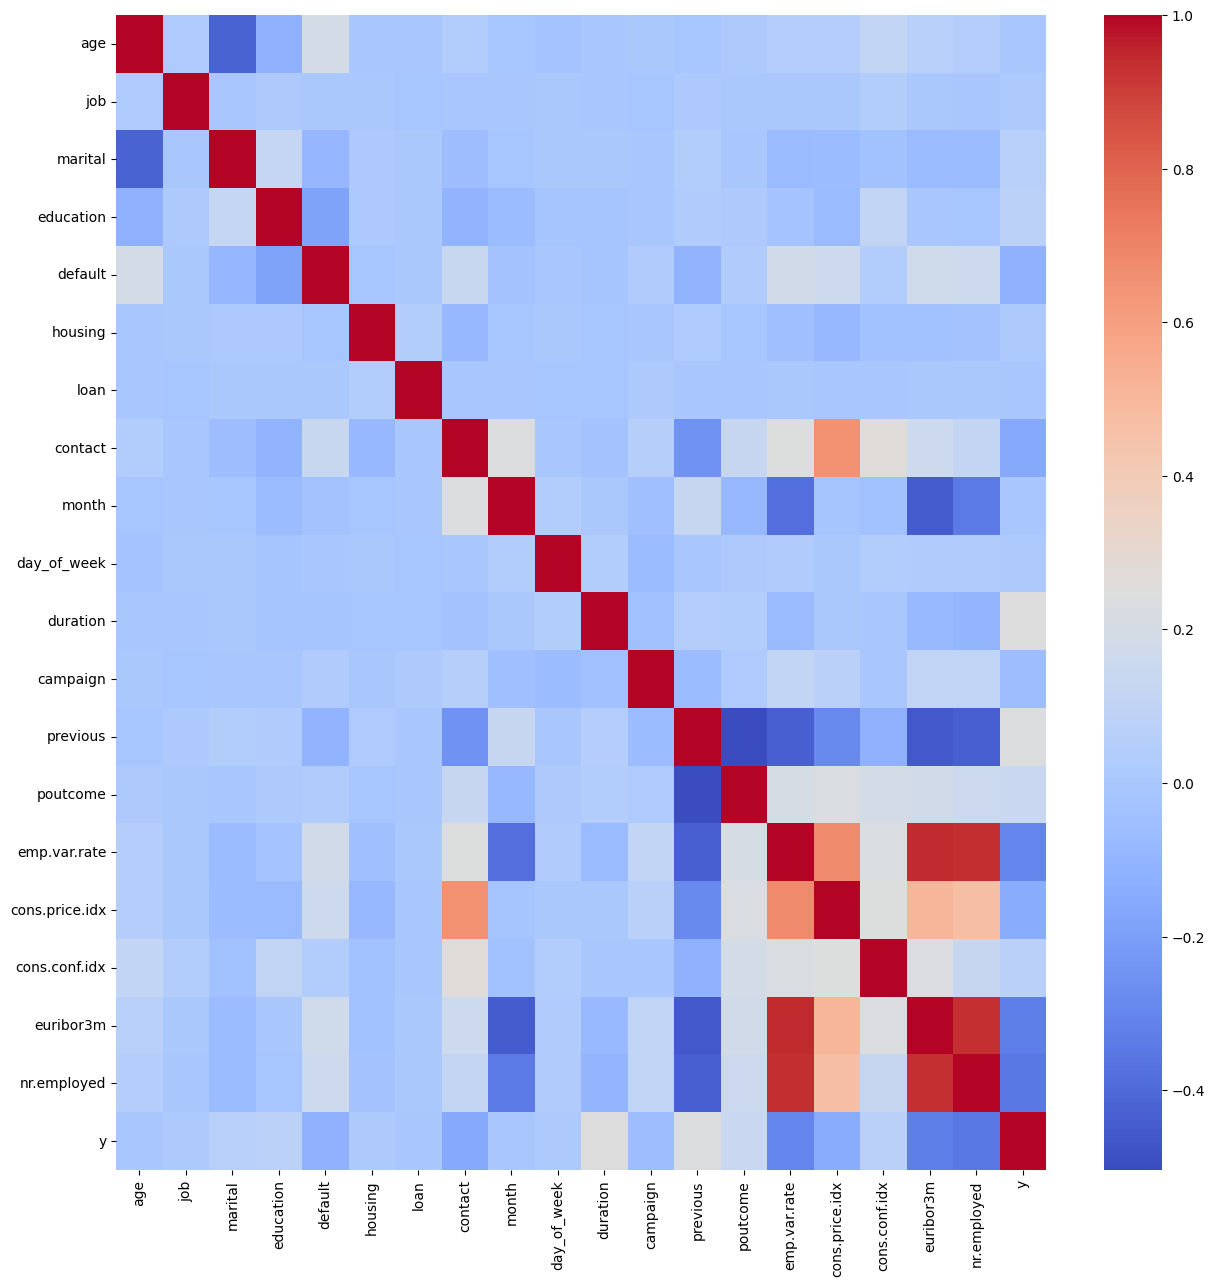

In [157]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

In [158]:
#scale numerical columns using standardscaler
scaler = StandardScaler()
df[integer_columns] = scaler.fit_transform(df[integer_columns])

In [159]:
df[integer_columns]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.526453,-0.201136,-0.282649,-1.755010,-0.509559,-1.091019,-0.451904,1.33170,0.743352,-0.720954,0.384934,-0.811274,-0.358428,0.200455,0.672405,0.744606,0.869682,0.733006,0.356377,-0.305613
1,1.622114,0.911530,-0.282649,-0.349373,1.960485,-1.091019,-0.451904,1.33170,0.743352,-0.720954,-0.414933,-0.811274,-0.358428,0.200455,0.672405,0.744606,0.869682,0.733006,0.356377,-0.305613
2,-0.291109,0.911530,-0.282649,-0.349373,-0.509559,0.939321,-0.451904,1.33170,0.743352,-0.720954,0.134975,-0.811274,-0.358428,0.200455,0.672405,0.744606,0.869682,0.733006,0.356377,-0.305613
3,-0.004126,-1.035635,-0.282649,-1.286464,-0.509559,-1.091019,-0.451904,1.33170,0.743352,-0.720954,-0.400650,-0.811274,-0.358428,0.200455,0.672405,0.744606,0.869682,0.733006,0.356377,-0.305613
4,1.526453,0.911530,-0.282649,-0.349373,-0.509559,-1.091019,2.314834,1.33170,0.743352,-0.720954,0.713451,-0.811274,-0.358428,0.200455,0.672405,0.744606,0.869682,0.733006,0.356377,-0.305613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.152693,0.355197,-0.282649,0.587718,-0.509559,0.939321,-0.451904,-0.75092,1.170849,-1.437525,0.906276,-0.811274,-0.358428,0.200455,-0.717878,2.073485,-2.203722,-1.459865,-2.770944,3.272110
41184,0.569841,-0.757468,-0.282649,0.587718,-0.509559,-1.091019,-0.451904,-0.75092,1.170849,-1.437525,1.256218,-0.811274,-0.358428,0.200455,-0.717878,2.073485,-2.203722,-1.459865,-2.770944,-0.305613
41185,1.526453,0.355197,-0.282649,1.056263,-0.509559,0.939321,-0.451904,-0.75092,1.170849,-1.437525,-0.129266,-0.031380,-0.358428,0.200455,-0.717878,2.073485,-2.203722,-1.459865,-2.770944,-0.305613
41186,0.378519,1.467863,-0.282649,0.587718,-0.509559,-1.091019,-0.451904,-0.75092,1.170849,-1.437525,1.677577,-0.811274,-0.358428,0.200455,-0.717878,2.073485,-2.203722,-1.459865,-2.770944,3.272110


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [174]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], test_size=0.2, random_state=42)

**Feature Importance**

Using Random Forest Decision tree, lets try to identify to important features for this dataset

In [175]:
from sklearn.ensemble import RandomForestRegressor

rdModel = RandomForestRegressor()
rdModel.fit(X_train, y_train)

importance = rdModel.feature_importances_
importance_df = pd.DataFrame(importance, index=df.drop('y', axis=1).columns, columns=["Importance"])

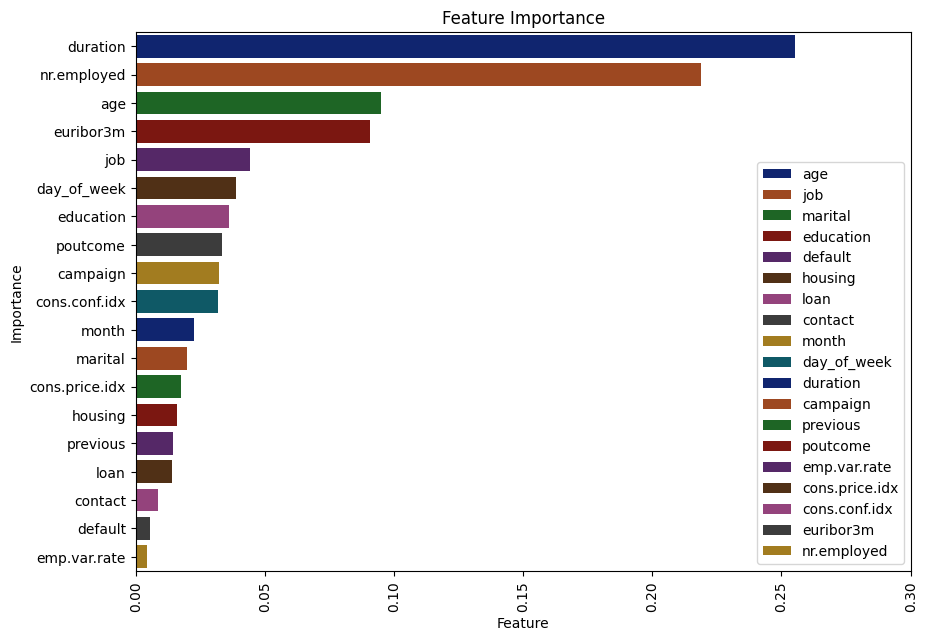

In [176]:
#draw plot of importance using sns
df_sorted = importance_df.sort_values(by='Importance', ascending=False)
fig,ax = plt.subplots(figsize=(10,7))
fig = sns.barplot(y=df_sorted.index, x=df_sorted.Importance, data =df_sorted,  ax=ax, palette='dark', hue=importance_df.index, legend= True)
ax.xaxis.set_ticks(ax.get_xticks()[::1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Feature Importance')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.legend(loc='lower right')
plt.show()

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

### Problem 9: Score the Model

What is the accuracy of your model?

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions